In [1]:
import os
import sys
src_dir = os.path.join('..', 'src')
sys.path.append(os.path.abspath(src_dir))
 
import pandas as pd
import numpy as np
import seaborn as sns
 
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
 
from data import path, get_dataset

In [2]:
data = get_dataset('comments_v2.csv')
data.all_awardings = data.all_awardings.astype('string')

../../data/datasets/comments_v2.csv


In [3]:
data[:10]

,Unnamed: 0,id,parent_id,post_id,all_awardings,body,created,created_utc,kind,depth,score,ups,downs
0,0,l0hnrw,NaN,l0hnrw,Helpful Wholesome Silver Hugz Snek,NaN,1.611083e+09,1.611054e+09,t3,-1,600.0,600,0
1,1,gjtt5l2,l0hnrw,l0hnrw,All-Seeing_Upvote Mind_Blown Buy Party_Train S...,If you want to talk GME please use the specifi...,1.611092e+09,1.611063e+09,t1,0,1.0,1,0
2,2,gk7w5ga,l0hnrw,l0hnrw,<NA>,BlackBerry shares are trading higher on above...,1.611370e+09,1.611341e+09,t1,0,1.0,1,0
3,3,gjz4xdd,l0hnrw,l0hnrw,<NA>,Any one buying AFRM?,1.611199e+09,1.611170e+09,t1,0,2.0,2,0
4,4,gjy4ztb,l0hnrw,l0hnrw,<NA>,Good entry point for BNGO,1.611183e+09,1.611154e+09,t1,0,1.0,1,0
5,5,gjy44uv,l0hnrw,l0hnrw,<NA>,"AMZN gapping over 3150, bless u bby, you can c...",1.611182e+09,1.611153e+09,t1,0,1.0,1,0
6,6,gjy26lc,l0hnrw,l0hnrw,<NA>,Jack Ma is really tiny face on really big head,1.611181e+09,1.611152e+09,t1,0,8.0,8,0
7,7,gjy1cm0,l0hnrw,l0hnrw,<NA>,Everyone quick buy JD.com while you can!,1.611181e+09,1.611152e+09,t1,0,2.0,2,0
8,8,gjy0bnc,l0hnrw,l0hnrw,<NA>,My pre-market read for the day:\n\r\nUSD Index...,1.611180e+09,1.611151e+09,t1,0,2.0,2,0
9,9,gjxqdso,l0hnrw,l0hnrw,<NA>,Big Tech is BACK after 6 months of stagnation....,1.611173e+09,1.611144e+09,t1,0,3.0,3,0


In [4]:
start      = '2021-01-19 11:00:00'
timeformat = '%Y-%m-%d %H:%M:%S'
begining   = datetime.strptime(start, timeformat)
 
def get_datetime(unix_time: list):
    return [datetime.utcfromtimestamp(ts).strftime(timeformat) for ts in unix_time]
 
data['datetime'] = get_datetime(data.created_utc.values)

In [5]:
values = 4320
l = [begining + timedelta(minutes = 10 * i) for i in range(values)]

timeseries = pd.DataFrame()
timeseries['datetime'] = [x.strftime(timeformat) for x in l]
timeseries['datetime'] = pd.to_datetime(timeseries['datetime'])  
data['datetime'] = pd.to_datetime(data['datetime'])  

In [6]:
data = data.sort_values('datetime')
timeseries = timeseries.sort_values('datetime')
# timeseries['created_utc'] = timeseries.datetime.astype(int)

In [7]:
type(timeseries.datetime[0])

pandas._libs.tslibs.timestamps.Timestamp

In [60]:
timeseries[:10]

,datetime,comments
0,2021-01-19 11:00:00,4.0
1,2021-01-19 11:10:00,11.0
2,2021-01-19 11:20:00,4.0
3,2021-01-19 11:30:00,12.0
4,2021-01-19 11:40:00,20.0
5,2021-01-19 11:50:00,10.0
6,2021-01-19 12:00:00,20.0
7,2021-01-19 12:10:00,9.0
8,2021-01-19 12:20:00,11.0
9,2021-01-19 12:30:00,7.0


In [10]:
data.post_id.value_counts()

lb6p29    201
lgy5ci    201
lfgvek    201
l8pr1a    201
l7weuu    201
         ... 
l6b8ri      1
l708k1      1
l6bdfy      1
l70l2d      1
la46v9      1
Name: post_id, Length: 38908, dtype: int64

4320


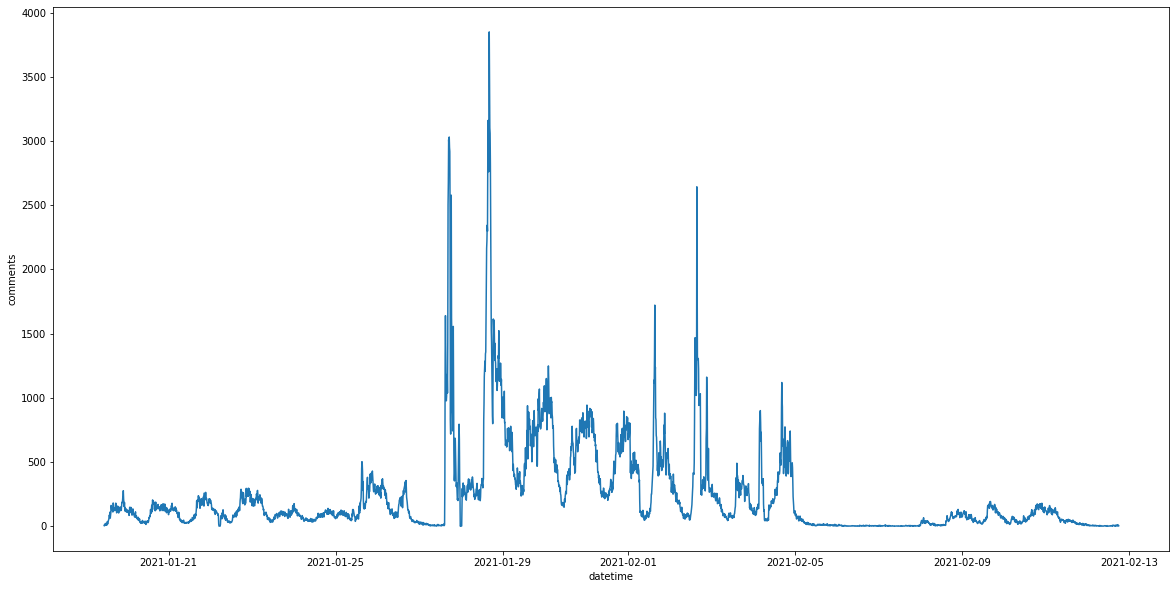

In [11]:
import numpy as np

def n_comments(timeseries, df):
    result = [None] * len(timeseries)
    print(len(timeseries))
    for i in tqdm(range(len(timeseries)-1)):
        #try:
#             mask = (df['datetime'] >= timeseries.datetime[i]) & (df['datetime'] < timeseries.datetime[i + 1])
#             result[i] = df[mask].shape[0]

            t1 = df['datetime'].searchsorted(timeseries.datetime[i], side='left')
            t2 = df['datetime'].searchsorted(timeseries.datetime[i + 1], side='left')
            
#             print(mask.tolist().index(1), len(mask.tolist()) - 1 - mask.tolist()[::-1].index(1), t1, t2, " ", df[mask].shape[0] == df.iloc[t1:t2].shape[0])
            result[i] = df.iloc[t1:t2].shape[0]
    
        #except:
           # result[i] = 0
        
    return result
 
timeseries['comments'] = n_comments(timeseries, data)
 
plt.figure(figsize=(20, 10))
sns.lineplot(data=timeseries[:3500], x="datetime", y="comments")

In [12]:
def divide_list(l, n):
    
    n_elems = int(len(l) / n)
    
    res = []
    for i in range(0, n-1):
        res.append(l[i*n_elems:(i+1)*n_elems])
        
    res.append(l[(n-1)*n_elems:])
    return res

In [13]:
[print(len(x)) for x in divide_list(list(range(0,10)),3)]

3
3
4


[None, None, None]

In [21]:
shape = 24 * 2 * 6
comments = data[:]
comments = comments.sort_values('datetime')

import os

def process_posts(proc_name_post_ids):
    
    proc_name = proc_name_post_ids[0]
    post_ids = proc_name_post_ids[1]
    
    timeseries_df = pd.DataFrame({
        'post_id': [],
        'datetime': [],
        'new_comments': [],
        'texts': []
    })
    
    autosave_i = 0
    x = time.time()
    for id_ in tqdm(post_ids):
        
        
        
        autosave_i = autosave_i + 1 
        post_comments     = comments[comments.post_id == id_]
        post_created_time = post_comments.datetime.values[0]

        result = ([None] * shape)
        texts  = ([None] * shape)
        times  = ([None] * shape)
        
        start_time = None
        end_time   = post_created_time
        
        for i in range(shape):
            start_time = end_time
            end_time   = start_time + np.timedelta64(10, 'm')
            
            times[i] = start_time
            
            t1 = post_comments['datetime'].searchsorted(start_time, side='left')
            t2 = post_comments['datetime'].searchsorted(end_time, side='left')
            
            derp = post_comments.iloc[t1:t2]
            
#             mask = (post_comments['datetime'] >= start_time) & (post_comments['datetime'] < end_time)
#             derp = post_comments[mask]
            
            result[i] = derp.shape[0]

            text = list(derp.body.values)
            text.extend([''] * (10 - len(text)))               
            texts[i] = text
        
        result[0] = result[0] - 1
        
        temp_df = pd.DataFrame({
            'post_id': [id_] * shape,
            'datetime': times,
            'new_comments': result,
            'texts': texts
        })
        
        timeseries_df = timeseries_df.append(temp_df, ignore_index=True)
        
#         if autosave_i % 100 == 0:
#             print("Autosaving", autosave_i)
#             timeseries_df.to_csv(os.path.join(path("dataset"), "processed_comments_{}.csv".format(i)), sep='`')
        
        if autosave_i % 25 == 0:
            print(proc_name, np.around(25/(time.time()-x),3), "it/s, done:{}/{}".format(autosave_i, len(post_ids)))
            x = time.time()
            
    return timeseries_df
 
    
def create_timeseries():
    post_ids = comments.post_id.unique()[:]
    
    timeseries_df = pd.DataFrame({
        'post_id': [],
        'datetime': [],
        'new_comments': [],
        'texts': []
    })
    
    from multiprocessing import cpu_count, Pool

    ids_ = zip(range(0,100), np.array_split(post_ids, cpu_count()))
    pool = Pool(cpu_count())
    df = pd.concat(pool.map(process_posts, ids_))
    pool.close()
    pool.join()
    
    return df
    
#     futures = []

#     n_workers = 1

    
#     with concurrent.futures.ThreadPoolExecutor(max_workers=n_workers) as executor:
        
#         lists = divide_list(post_ids, n_workers)
        
#         dbg = []
#         for l in lists:
#             dbg.append(len(l))
#             futures.append(executor.submit(process_posts, l))
            
#         print(dbg)
        
#         for f in futures:
#             timeseries_df = timeseries_df.append(f.result())
            
#     return timeseries_df
    


In [22]:
import concurrent.futures
import requests
import threading
import time


In [23]:
x = time.time()
my_timeseries = create_timeseries()
print(time.time() - x)

0 3.423 it/s, done:25/4864
7 3.405 it/s, done:25/4863
6 3.352 it/s, done:25/4863
2 3.367 it/s, done:25/4864
5 3.34 it/s, done:25/4863
4 3.346 it/s, done:25/4863
1 3.311 it/s, done:25/4864
3 3.255 it/s, done:25/4864
7 3.259 it/s, done:50/4863
6 3.249 it/s, done:50/4863
0 3.15 it/s, done:50/4864
4 3.237 it/s, done:50/4863
5 3.206 it/s, done:50/4863
3 3.271 it/s, done:50/4864
1 3.21 it/s, done:50/4864
2 3.129 it/s, done:50/4864
7 3.249 it/s, done:75/4863
6 3.233 it/s, done:75/4863
3 3.285 it/s, done:75/4864
5 3.245 it/s, done:75/4863
0 3.186 it/s, done:75/4864
4 3.184 it/s, done:75/4863
2 3.267 it/s, done:75/4864
1 3.19 it/s, done:75/4864
7 3.226 it/s, done:100/4863
3 3.301 it/s, done:100/4864
5 3.234 it/s, done:100/4863
6 3.147 it/s, done:100/4863
0 3.2 it/s, done:100/4864
2 3.207 it/s, done:100/4864
4 3.151 it/s, done:100/4863
1 3.18 it/s, done:100/4864
7 3.224 it/s, done:125/4863
5 3.293 it/s, done:125/4863
3 3.191 it/s, done:125/4864
6 3.301 it/s, done:125/4863
0 3.24 it/s, done:125/4

0 2.63 it/s, done:925/4864
5 2.685 it/s, done:950/4863
2 2.688 it/s, done:950/4864
7 2.672 it/s, done:950/4863
1 2.578 it/s, done:950/4864
3 2.702 it/s, done:950/4864
4 2.682 it/s, done:950/4863
0 2.734 it/s, done:950/4864
6 2.603 it/s, done:950/4863
5 2.666 it/s, done:975/4863
2 2.66 it/s, done:975/4864
4 2.728 it/s, done:975/4863
7 2.604 it/s, done:975/4863
3 2.617 it/s, done:975/4864
1 2.597 it/s, done:975/4864
0 2.678 it/s, done:975/4864
6 2.653 it/s, done:975/4863
5 2.714 it/s, done:1000/4863
2 2.632 it/s, done:1000/4864
4 2.675 it/s, done:1000/4863
7 2.65 it/s, done:1000/4863
3 2.656 it/s, done:1000/4864
1 2.598 it/s, done:1000/4864
0 2.591 it/s, done:1000/4864
6 2.655 it/s, done:1000/4863
5 2.609 it/s, done:1025/4863
2 2.673 it/s, done:1025/4864
4 2.638 it/s, done:1025/4863
7 2.574 it/s, done:1025/4863
1 2.644 it/s, done:1025/4864
3 2.576 it/s, done:1025/4864
0 2.622 it/s, done:1025/4864
6 2.622 it/s, done:1025/4863
5 2.476 it/s, done:1050/4863
2 2.517 it/s, done:1050/4864
4 2.4

3 2.093 it/s, done:1825/4864
7 2.074 it/s, done:1825/4863
0 2.066 it/s, done:1825/4864
6 2.087 it/s, done:1825/4863
4 2.104 it/s, done:1850/4863
2 2.106 it/s, done:1850/4864
5 1.981 it/s, done:1850/4863
1 2.028 it/s, done:1850/4864
3 2.02 it/s, done:1850/4864
7 2.062 it/s, done:1850/4863
0 2.092 it/s, done:1850/4864
6 2.091 it/s, done:1850/4863
2 2.01 it/s, done:1875/4864
4 1.906 it/s, done:1875/4863
5 1.984 it/s, done:1875/4863
1 1.946 it/s, done:1875/4864
0 1.995 it/s, done:1875/4864
3 1.929 it/s, done:1875/4864
7 1.904 it/s, done:1875/4863
6 1.905 it/s, done:1875/4863
2 2.096 it/s, done:1900/4864
4 2.024 it/s, done:1900/4863
5 2.046 it/s, done:1900/4863
1 2.053 it/s, done:1900/4864
7 2.075 it/s, done:1900/4863
0 2.004 it/s, done:1900/4864
3 2.01 it/s, done:1900/4864
6 2.065 it/s, done:1900/4863
2 1.983 it/s, done:1925/4864
4 2.023 it/s, done:1925/4863
5 2.035 it/s, done:1925/4863
1 1.982 it/s, done:1925/4864
7 2.018 it/s, done:1925/4863
0 2.012 it/s, done:1925/4864
3 1.977 it/s, don

2 1.686 it/s, done:2725/4864
4 1.707 it/s, done:2725/4863
5 1.671 it/s, done:2725/4863
6 1.677 it/s, done:2725/4863
1 1.692 it/s, done:2725/4864
0 1.691 it/s, done:2725/4864
7 1.698 it/s, done:2725/4863
3 1.716 it/s, done:2725/4864
2 1.664 it/s, done:2750/4864
4 1.624 it/s, done:2750/4863
1 1.647 it/s, done:2750/4864
5 1.605 it/s, done:2750/4863
6 1.619 it/s, done:2750/4863
0 1.603 it/s, done:2750/4864
7 1.628 it/s, done:2750/4863
3 1.603 it/s, done:2750/4864
2 1.683 it/s, done:2775/4864
4 1.68 it/s, done:2775/4863
1 1.693 it/s, done:2775/4864
6 1.684 it/s, done:2775/4863
5 1.647 it/s, done:2775/4863
0 1.616 it/s, done:2775/4864
7 1.655 it/s, done:2775/4863
3 1.627 it/s, done:2775/4864
2 1.681 it/s, done:2800/4864
4 1.659 it/s, done:2800/4863
1 1.648 it/s, done:2800/4864
6 1.628 it/s, done:2800/4863
0 1.683 it/s, done:2800/4864
5 1.603 it/s, done:2800/4863
7 1.646 it/s, done:2800/4863
3 1.646 it/s, done:2800/4864
2 1.65 it/s, done:2825/4864
4 1.621 it/s, done:2825/4863
1 1.631 it/s, do

3 1.413 it/s, done:3600/4864
7 1.323 it/s, done:3600/4863
5 1.347 it/s, done:3600/4863
0 1.328 it/s, done:3600/4864
2 1.367 it/s, done:3625/4864
4 1.36 it/s, done:3625/4863
6 1.389 it/s, done:3625/4863
1 1.296 it/s, done:3625/4864
3 1.29 it/s, done:3625/4864
7 1.304 it/s, done:3625/4863
5 1.339 it/s, done:3625/4863
0 1.329 it/s, done:3625/4864
2 1.288 it/s, done:3650/4864
4 1.325 it/s, done:3650/4863
6 1.344 it/s, done:3650/4863
1 1.321 it/s, done:3650/4864
3 1.348 it/s, done:3650/4864
7 1.334 it/s, done:3650/4863
5 1.302 it/s, done:3650/4863
0 1.345 it/s, done:3650/4864
2 1.318 it/s, done:3675/4864
4 1.334 it/s, done:3675/4863
6 1.356 it/s, done:3675/4863
1 1.341 it/s, done:3675/4864
3 1.311 it/s, done:3675/4864
7 1.351 it/s, done:3675/4863
5 1.338 it/s, done:3675/4863
0 1.318 it/s, done:3675/4864
2 1.34 it/s, done:3700/4864
4 1.343 it/s, done:3700/4863
6 1.363 it/s, done:3700/4863
1 1.315 it/s, done:3700/4864
3 1.329 it/s, done:3700/4864
7 1.323 it/s, done:3700/4863
5 1.335 it/s, don

4 1.173 it/s, done:4500/4863
2 1.169 it/s, done:4500/4864
6 1.179 it/s, done:4500/4863
1 1.146 it/s, done:4500/4864
5 1.183 it/s, done:4500/4863
3 1.178 it/s, done:4500/4864
7 1.157 it/s, done:4500/4863
0 1.18 it/s, done:4500/4864
4 1.147 it/s, done:4525/4863
2 1.163 it/s, done:4525/4864
6 1.181 it/s, done:4525/4863
1 1.111 it/s, done:4525/4864
5 1.144 it/s, done:4525/4863
3 1.129 it/s, done:4525/4864
7 1.164 it/s, done:4525/4863
0 1.14 it/s, done:4525/4864
4 1.147 it/s, done:4550/4863
2 1.142 it/s, done:4550/4864
6 1.128 it/s, done:4550/4863
1 1.149 it/s, done:4550/4864
3 1.179 it/s, done:4550/4864
5 1.136 it/s, done:4550/4863
7 1.173 it/s, done:4550/4863
0 1.141 it/s, done:4550/4864
4 1.157 it/s, done:4575/4863
2 1.164 it/s, done:4575/4864
6 1.143 it/s, done:4575/4863
1 1.155 it/s, done:4575/4864
3 1.145 it/s, done:4575/4864
5 1.137 it/s, done:4575/4863
7 1.17 it/s, done:4575/4863
0 1.17 it/s, done:4575/4864
4 1.145 it/s, done:4600/4863
2 1.141 it/s, done:4600/4864
6 1.169 it/s, done

In [31]:
my_timeseries.to_csv(os.path.join(path("dataset"), "processed_comments_total.csv"), sep='`', index=False)

In [27]:
my_timeseries[my_timeseries.new_comments != 0.0][:50]

,post_id,datetime,new_comments,texts
14,l0hnrw,2021-01-19 13:20:21,1.0,[If you want to talk GME please use the specif...
62,l0hnrw,2021-01-19 21:20:21,10.0,"[Dare me to buy 2 call orders @14 1/22?, [usun..."
63,l0hnrw,2021-01-19 21:30:21,9.0,[Apple gonna pull a netflix next week. Cya at ...
64,l0hnrw,2021-01-19 21:40:21,9.0,"[I actually lost money today. Thanks ABNB, Ban..."
65,l0hnrw,2021-01-19 21:50:21,5.0,"[BB40EOW, Friday was just a rough ass day man...."
66,l0hnrw,2021-01-19 22:00:21,10.0,"[I like your big dick energy, Yeah wtf. We lov..."
67,l0hnrw,2021-01-19 22:10:21,9.0,"[If NFLX can go up 13%, $amzn gonna go brrr at..."
68,l0hnrw,2021-01-19 22:20:21,6.0,[Want to buy OTM FDd on a 2B company. But the...
69,l0hnrw,2021-01-19 22:30:21,10.0,[BB is not a short squeeze play. BB is accordi...
70,l0hnrw,2021-01-19 22:40:21,20.0,"[Ban for ignorance, Ditto, 75 stocks 10 Spread..."


In [28]:
my_timeseries.shape

(11205504, 4)

In [30]:
my_timeseries.post_id.unique().shape

(38908,)

In [54]:
post_data = my_timeseries[my_timeseries.post_id == 'l0hnrw']

post_data['accumulated_comments'] = [0] * post_data.shape[0]
acc = 0
acc_list = []
for i in range(post_data.shape[0]):
    acc += post_data.iloc[i].new_comments
    acc_list.append(acc)
    
post_data.accumulated_comments = acc_list

/home/stwasik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/stwasik/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


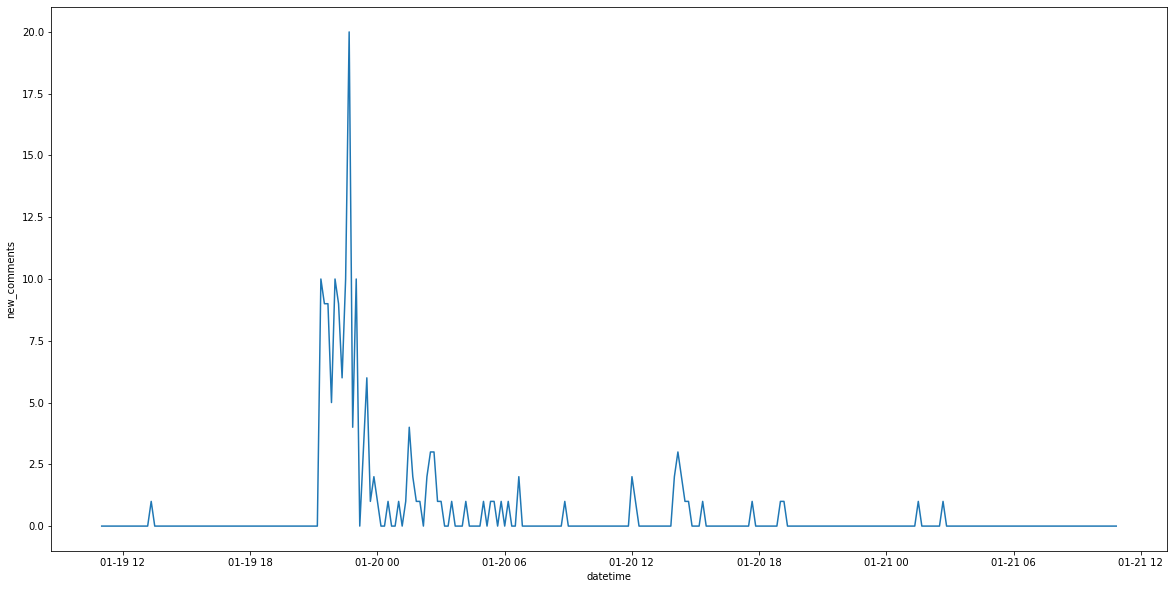

In [59]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=post_data, x="datetime", y="new_comments")

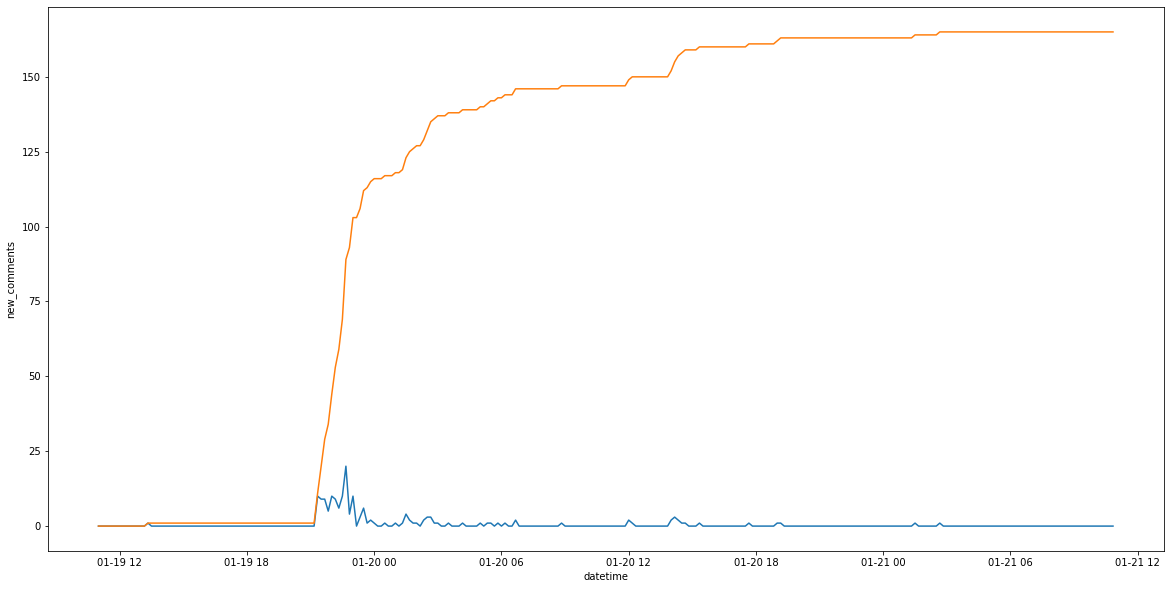

In [57]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=post_data, x="datetime", y="new_comments")
sns.lineplot(data=post_data, x="datetime", y="accumulated_comments")